In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
from sklearn.datasets import make_blobs, load_sample_image

import warnings; warnings.simplefilter('ignore') # Fix numpy issues

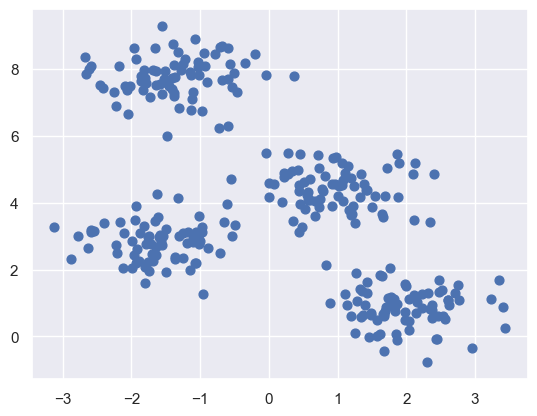

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4,
                      cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=40);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

  File "E:\CONDA\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


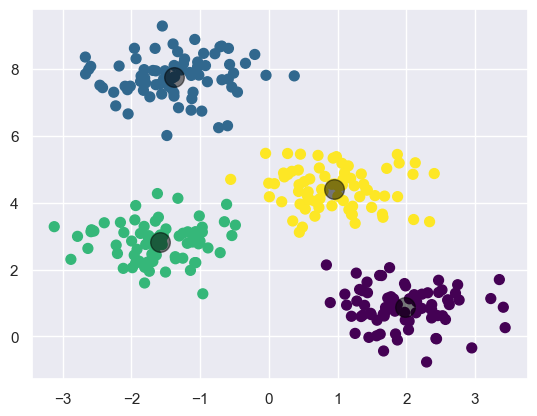

In [4]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. assign labels based on the closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from the means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence; If Centeroids are static
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.5, c='black');
    

# Color Compression using K-Means Clustering

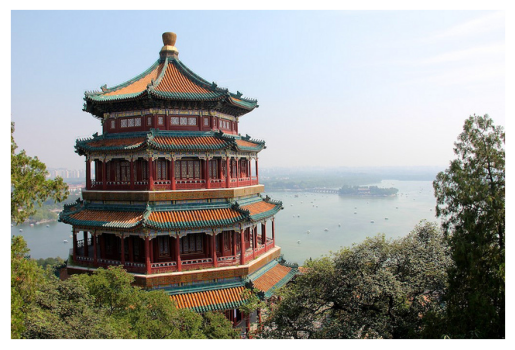

In [5]:
image = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image);

In [6]:
image.shape

(427, 640, 3)

In [7]:
data = image / 255.0 # using 0.....1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [8]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Setting Randomness
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]

    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

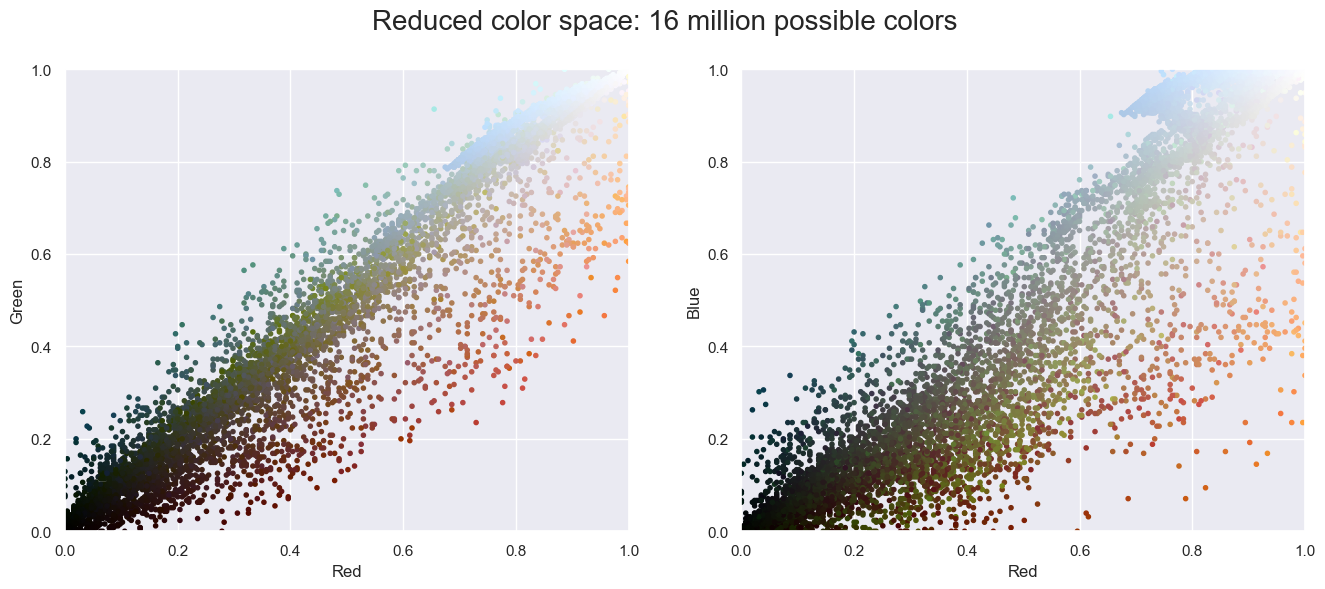

In [9]:
plot_pixels(data, title='Reduced color space: 16 million possible colors')

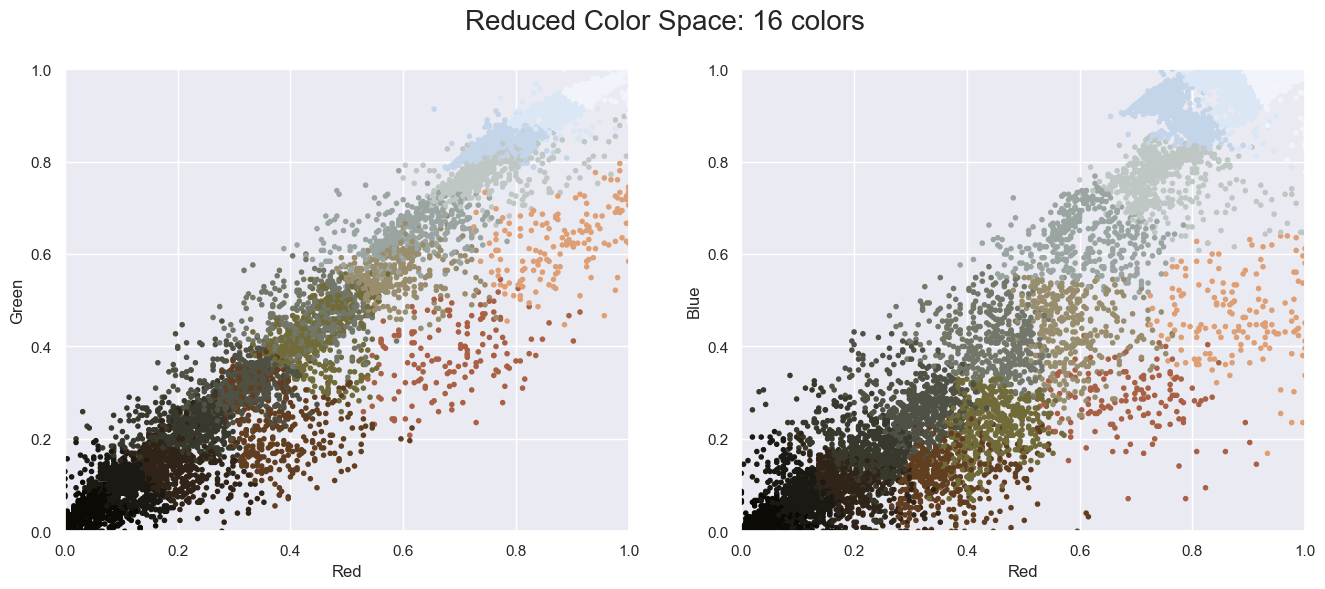

In [10]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title='Reduced Color Space: 16 colors')

Text(0.5, 1.0, '16 Colors Image')

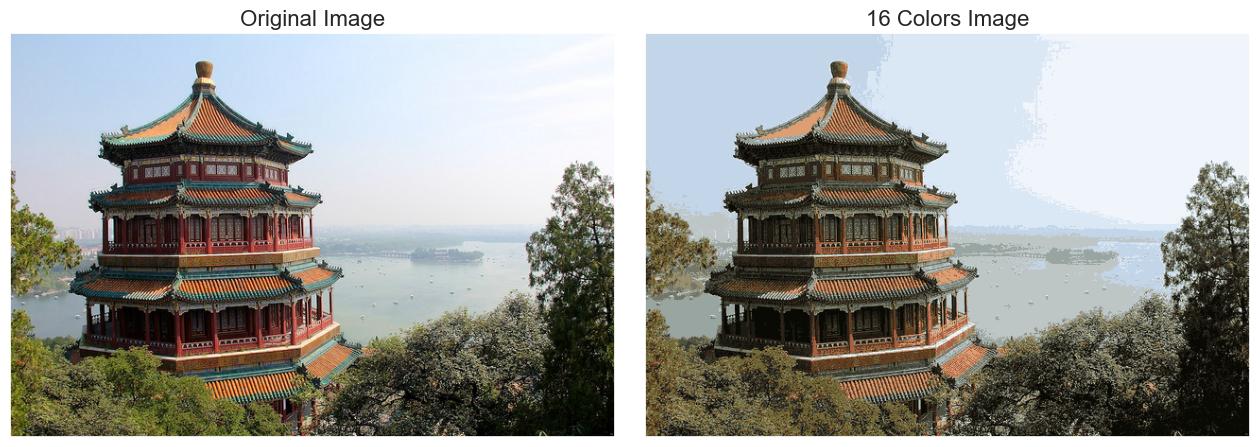

In [11]:
image_recolored = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                     subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(image_recolored)
ax[1].set_title('16 Colors Image', size=16)